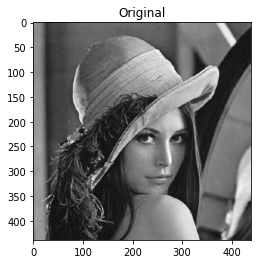

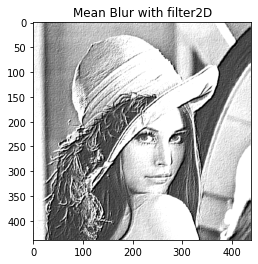

12


TypeError: Image data of dtype object cannot be converted to float

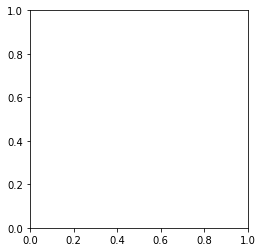

In [36]:
'''
test
 """f_img = r'D:\marcb\MP\start\resize\ '
    img = Image.open(f_img)
    img = img.resize((128,128))
    img.save(f_img)"""
    #path = glob.glob("\start\*.jpg")
path = glob.glob("/start/hft.jpg")
for file in path:
    img = cv2.imread(file)
    print(img)
    plt.imshow(img)
    plt.show()
'''
import glob
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import os
path = "start"
images = os.listdir(path)
print(len(images))

for img in images:
       f_img = "resize"
       img = cv2.imread(os.path.join(path,img))
       img = img.resize((128,128))
       plt.imshow(img)
       plt.show()

       #img.save(f_img)


In [ ]:
'''
task 1
sharpen, brighten the image highpass shrapen
'''
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#kernel = np.ones((5,5),np.float32)/25
kernel = np.array([[-2 , -1, 1], [-1, 1, 1], [0, 1, 2]])

dst = cv2.filter2D(img,-1,kernel)

plt.imshow(img, cmap="gray"),plt.title('Original')
plt.show()


plt.imshow(dst, cmap="gray"),plt.title('Mean Blur with filter2D')
plt.show()


normal lena


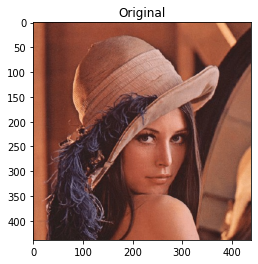

add gaussian noise


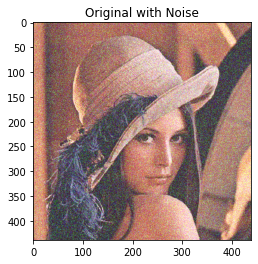

add SP noise


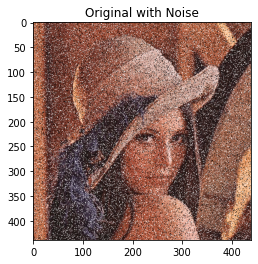

Mean Blur SP


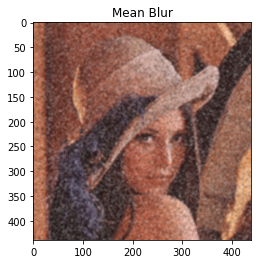

Median Blur SP


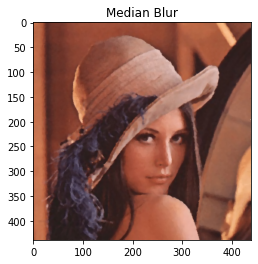

gaussian Blur SP


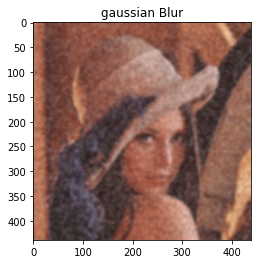

Mean Blur Gaussian


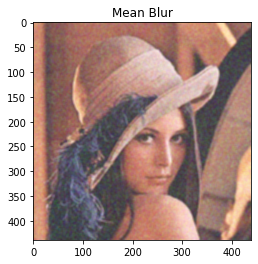

Median Blur Gaussian


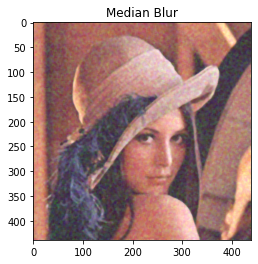

gaussian Blur Gaussian


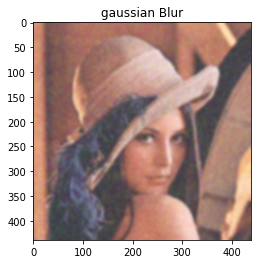

task3.2
-------------------------------------------------


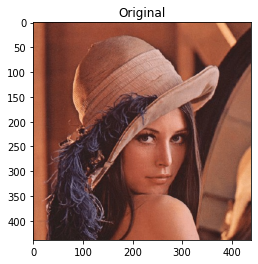

billaterial SP


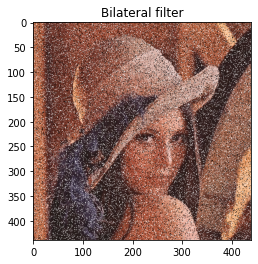

boxfilter SP


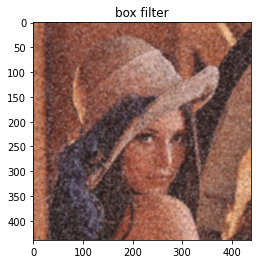

billaterial Gaussian


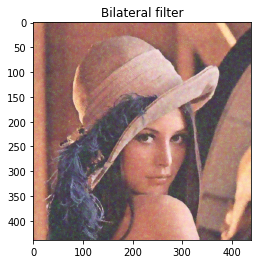

boxfilter Gaussian


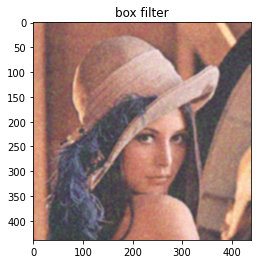

In [17]:
'''
task 2
'''

import cv2
import numpy as np
from matplotlib import pyplot as plt



def addsalt_pepper(img, SNR):
    img_ = img.copy()
    c, h, w = img_.shape
    mask = np.random.choice((0, 1, 2), size=(1, h, w), p=[SNR, (1 - SNR) / 2., (1 - SNR) / 2.])
    mask = np.repeat(mask, c, axis=0)
    img_[mask == 1] = 255 # salt noise
    img_[mask == 2] = 0 #
    return img_

def addgaussian_noise(img):
    im = np.zeros(img.shape, np.uint8)
    mean = 20, 30, 40
    sigma = 20, 50, 40
    cv2.randn(im,mean,sigma)
    im_noise = cv2.add(img, im)
    return im_noise
print('normal lena')
img = cv2.imread('lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img),plt.title('Original')
plt.show()

#Add noice gaussian
im_noise_g = addgaussian_noise(img)
print('add gaussian noise')
 # add the noise to the original image
plt.imshow(im_noise_g, cmap='gray')
plt.title('Original with Noise')
plt.show()

#Add noise
print('add SP noise')
im_noise = addsalt_pepper(img.transpose(2, 1, 0), 0.8)
im_noise = im_noise.transpose(2, 1, 0)
 # add the noise to the original image
plt.imshow(im_noise, cmap='gray')
plt.title('Original with Noise')
plt.show()

#mean blur average value of N*N pixel picture
blur = cv2.blur(im_noise,(5,5))
print('Mean Blur SP')
plt.imshow(blur),plt.title('Mean Blur')
plt.show()

#median blur good for reduce noise, looks at neighbours
medblur = cv2.medianBlur(im_noise,5)
print('Median Blur SP')
plt.imshow(medblur),plt.title('Median Blur')
plt.show()

#gaussian blur more in the middle more weight
gaussianblur = cv2.GaussianBlur(im_noise,(15,15),sigmaX=0,sigmaY=0)
print('gaussian Blur SP')
plt.imshow(gaussianblur),plt.title('gaussian Blur')
plt.show()

#mean blur average value of N*N pixel picture
blur = cv2.blur(im_noise_g,(5,5))
print('Mean Blur Gaussian')
plt.imshow(blur),plt.title('Mean Blur')
plt.show()

#median blur good for reduce noise, looks at neighbours
medblur = cv2.medianBlur(im_noise_g,5)
print('Median Blur Gaussian')
plt.imshow(medblur),plt.title('Median Blur')
plt.show()

#gaussian blur more in the middle more weight
gaussianblur = cv2.GaussianBlur(im_noise_g,(15,15),sigmaX=0,sigmaY=0)
print('gaussian Blur Gaussian')
plt.imshow(gaussianblur),plt.title('gaussian Blur')
plt.show()
print('task3.2')
print('-------------------------------------------------')

img = cv2.imread('lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img),plt.title('Original')
plt.show()
# is selective => operates differently => depends on what it surrounds
# good to eliminate sutten variations
# bilaterial respect colour and distance, protect edges
bilblur = cv2.bilateralFilter(im_noise,9,75,75)
print('billaterial SP')
plt.imshow(bilblur),plt.title('Bilateral filter')
plt.show()

boxblur = cv2.boxFilter(im_noise,-1,(5,5))
print('boxfilter SP')
plt.imshow(boxblur),plt.title('box filter')
plt.show()

bilblur = cv2.bilateralFilter(im_noise_g,9,75,75)
print('billaterial Gaussian')
plt.imshow(bilblur),plt.title('Bilateral filter')
plt.show()

boxblur = cv2.boxFilter(im_noise_g,-1,(5,5))
print('boxfilter Gaussian')
plt.imshow(boxblur),plt.title('box filter')
plt.show()

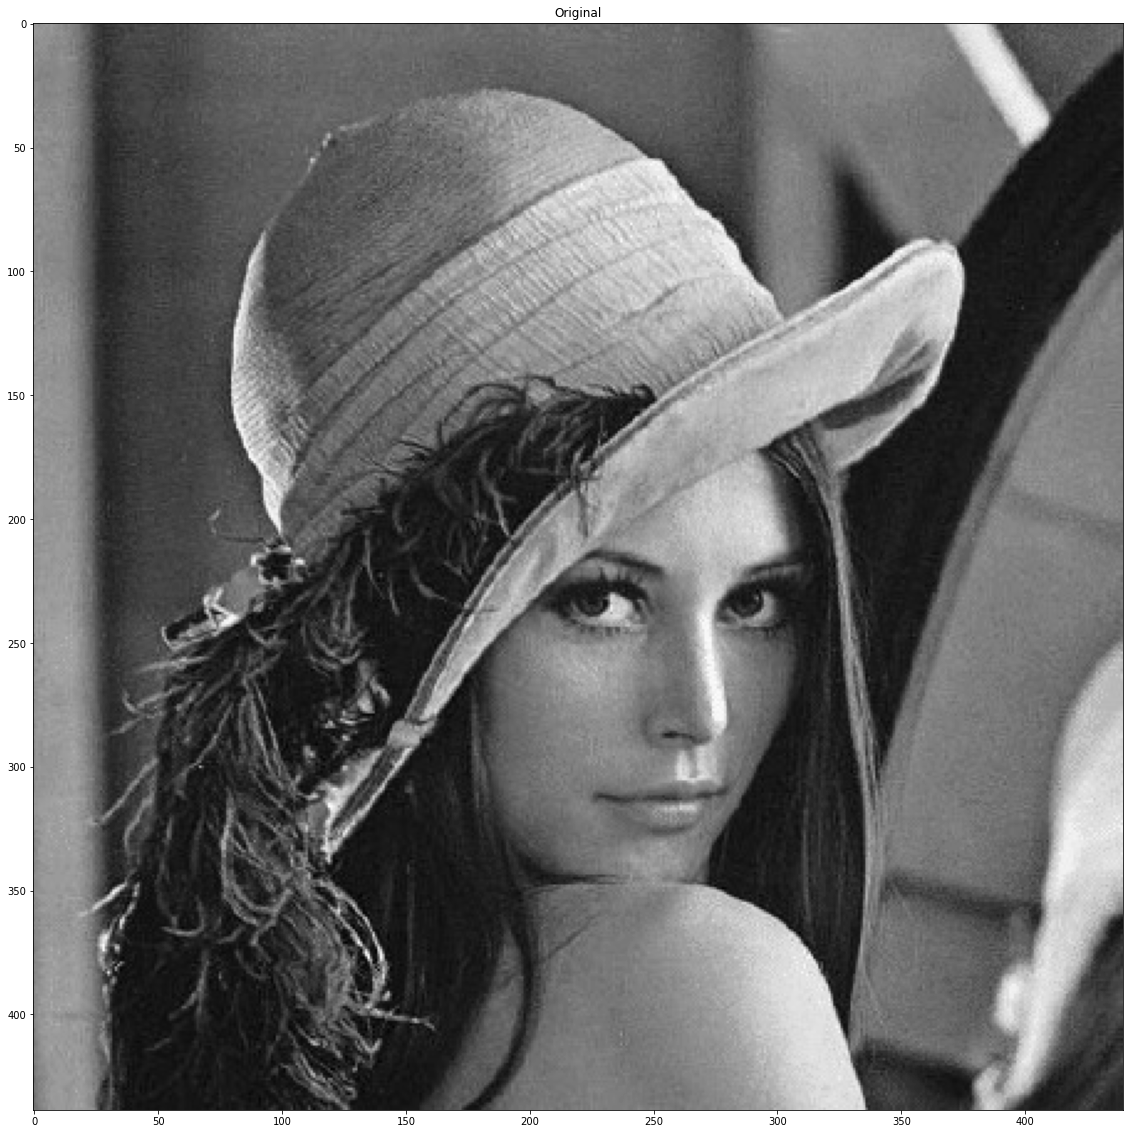

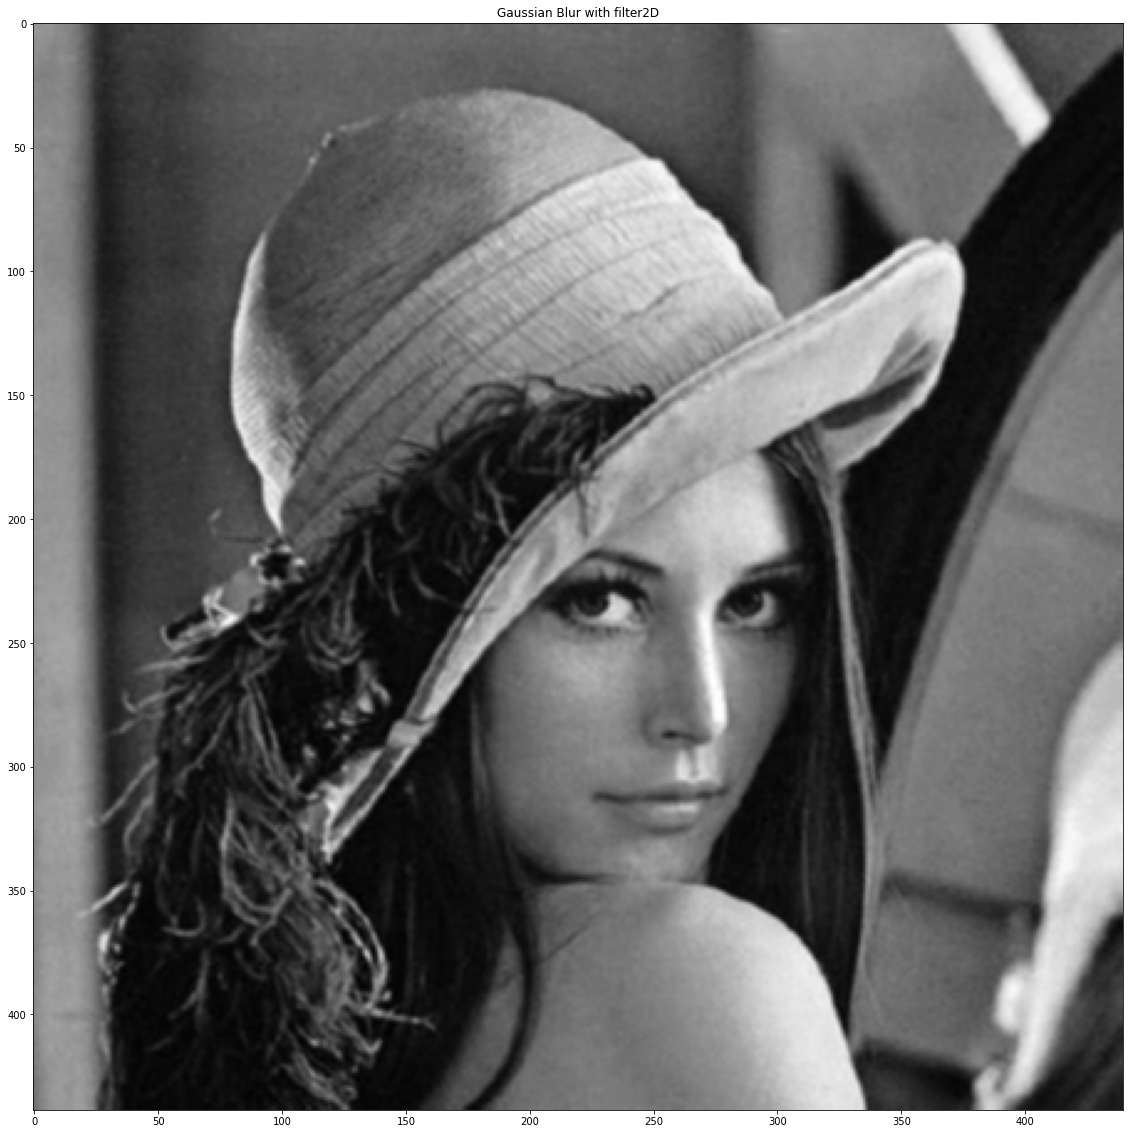

In [13]:
'''
task 3
'''
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
img = cv2.imread('lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#kernel = np.ones((5,5),np.float32)/25
kernel = np.array([[1 , 2, 1], [2, 4, 2], [1, 2, 1]])/16

dst = cv2.filter2D(img,-1,kernel)
plt.imshow(img, cmap="gray"),plt.title('Original')
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(dst, cmap="gray"),plt.title('Gaussian Blur with filter2D')
plt.show()

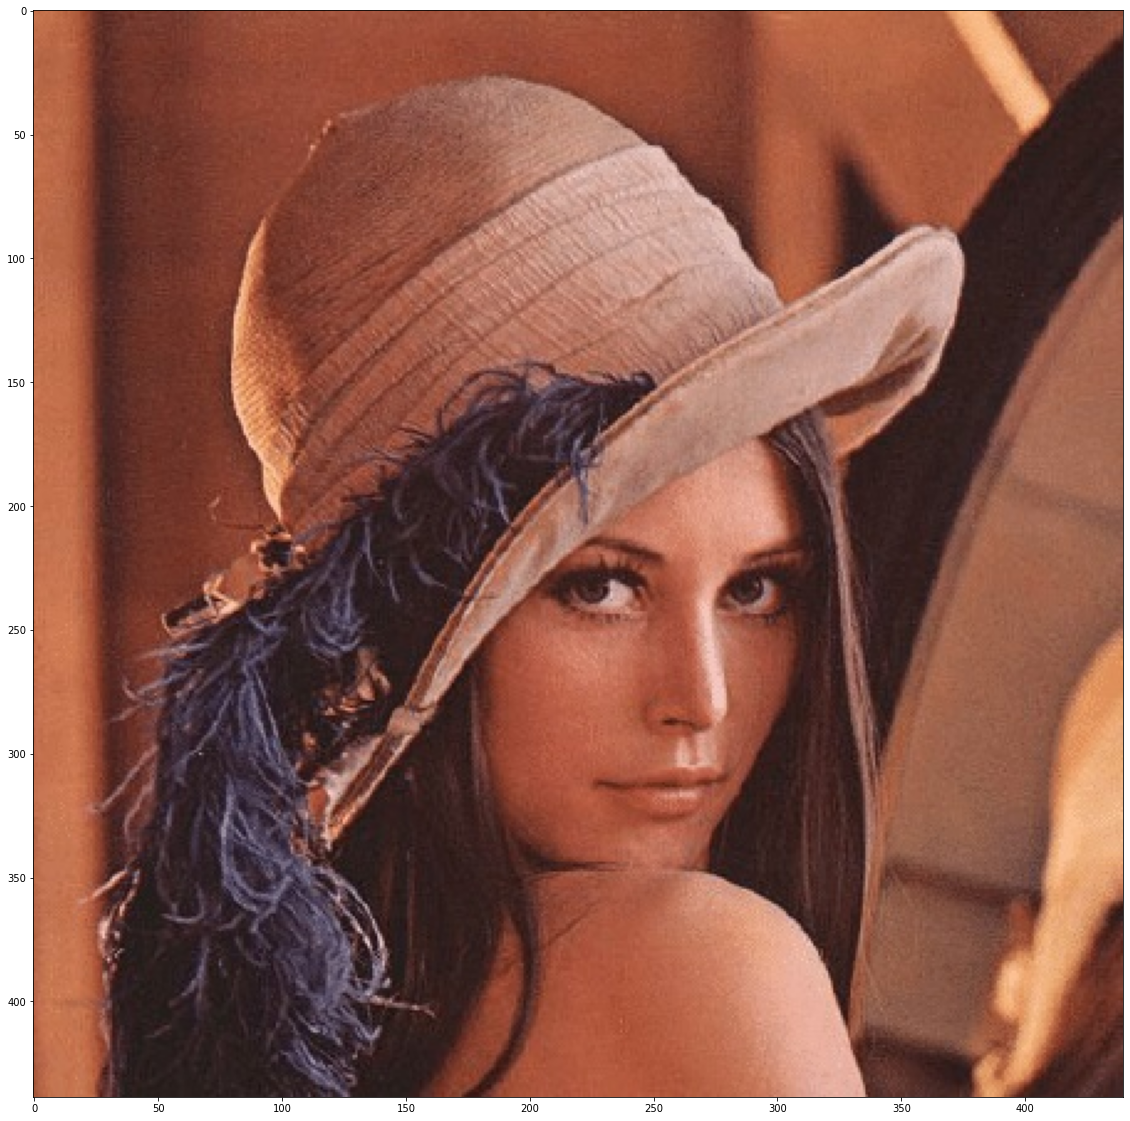

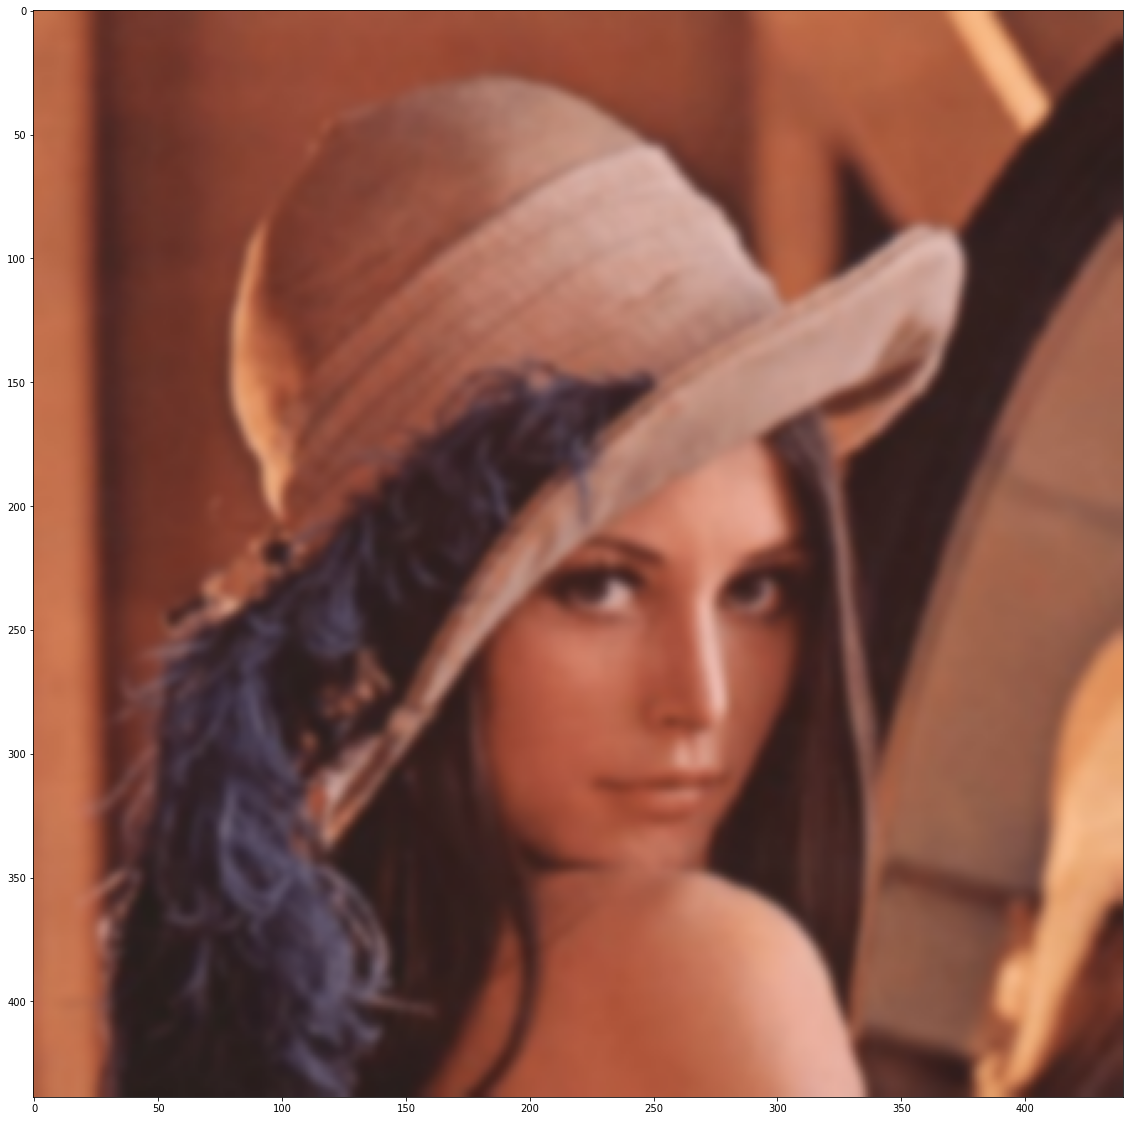